In [1]:
# Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset 'haberman' and assigning as df

df = pd.read_csv('haberman.csv')
df.head()

,Age,Operation_Year,Axil_Nodes_Detected,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Understanding the dataset variables.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                    306 non-null int64
Operation_Year         306 non-null int64
Axil_Nodes_Detected    306 non-null int64
Survival_Status        306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


Total number of columns: 4 (Age, Operation_Year, Axil_Nodes_Detected and Survival_Status)

Total number of rows: 306

Age: This column represents the age of a patient.

Operation_Year: This column represents the year of operation patient had undergone.

Axil_Nodes_Detected: Number of axil lymph nodes detected

Survival_Status: Represent if the patient is alive or died after operation.

# Objective:

Analyse how many patients survived more than 5 years after undergoing cancer operation and how many died within 5 years.

In [4]:
df['Survival_Status'].unique()

array([1, 2], dtype=int64)

Survival_Status column has 2 unique values which are 1 and 2.

1 represents patient has survived after operation.

2 represents patient has died after operation

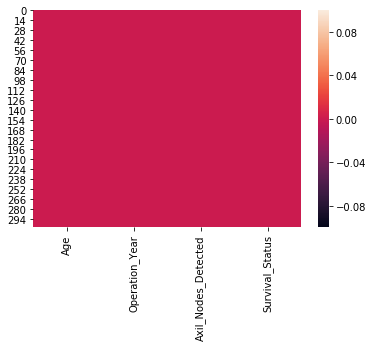

In [5]:
sns.heatmap(df.isnull())

Dataset df has no null values.

# Data Preparation

In [6]:
print('Number of columns:' + ' ' + str(df.shape[0]))
print('Number of rows:' + ' ' + str(df.shape[1]))

Number of columns: 306
Number of rows: 4


In [7]:
print('Total number of patients survived after operation:' + ' ' + str(df[df['Survival_Status'] == 1]['Survival_Status'].count()))
print('Total number of patients survived after operation:' + ' ' + str(df[df['Survival_Status'] == 2]['Survival_Status'].count()))
print()
print('************************************')
print()
print("Percentage of patients survived and not survived after operation respectively")
print(str(round(100*(df['Survival_Status'].value_counts())/len(df.index),2)))

Total number of patients survived after operation: 225
Total number of patients survived after operation: 81

************************************

Percentage of patients survived and not survived after operation respectively
1    73.53
2    26.47
Name: Survival_Status, dtype: float64


# Exploratory Data Analysis

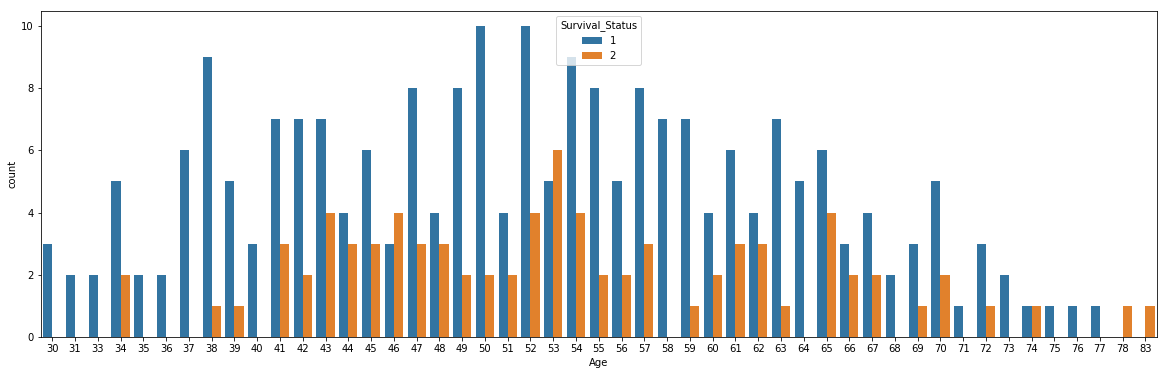

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(data = df, x = 'Age', hue = 'Survival_Status')

# Observation:

Improper data to analyse the cancer affected age group.

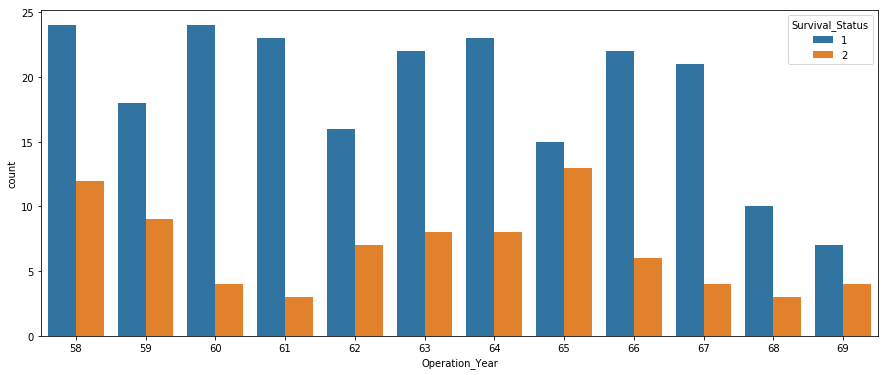

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'Operation_Year', hue='Survival_Status')

# Observation:

Most of cancer patients survived more than 5 years after operation.

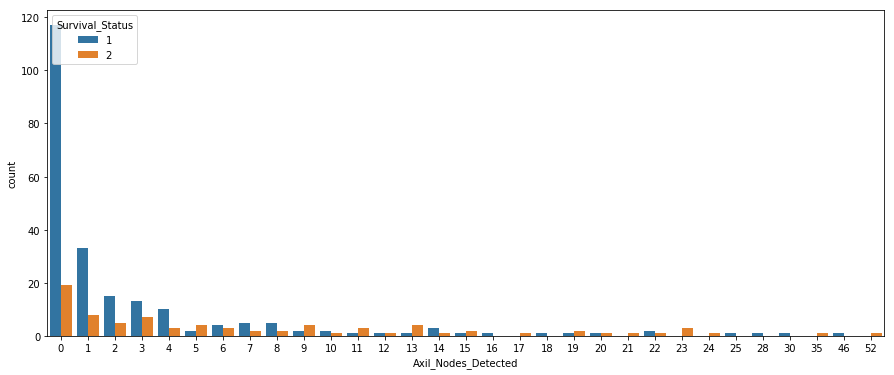

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(data = df, x = 'Axil_Nodes_Detected', hue='Survival_Status')

# Observation:

Patients with less number of axil nodes have more chances of surviving.

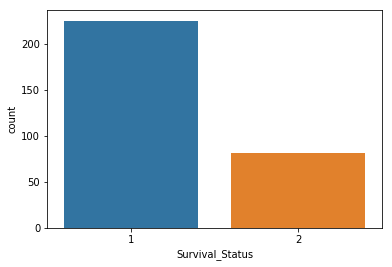

In [11]:
sns.countplot(data = df, x = 'Survival_Status')

Blue line- 225 cancer patients survived for more than 5 years after operation

Orange line- 81 cancer patients died within 5 years after operation

# Univariate Analysis:

Analysing using 1 variable.

Visualizing using distplot.

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


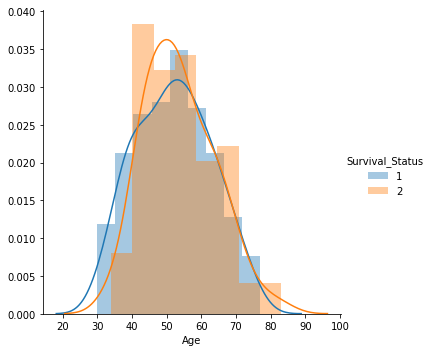

In [12]:
f = sns.FacetGrid(data = df, hue = 'Survival_Status', size = 5)
f.map(sns.distplot, 'Age')
f.add_legend()

# Observation: 

Huge overlap. Can't use 'Age' data to analyse.

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


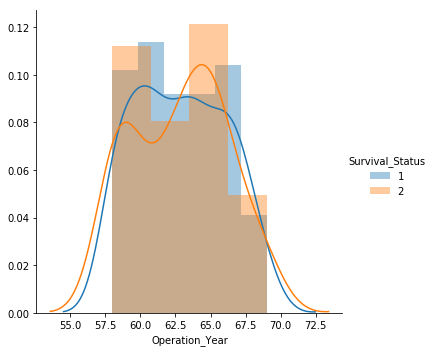

In [13]:
f = sns.FacetGrid(data = df, hue = 'Survival_Status', size = 5)
f.map(sns.distplot, 'Operation_Year')
f.add_legend()

#Observation: 

Huge overlap. Can't use 'Operation_Year' data to analyse.

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


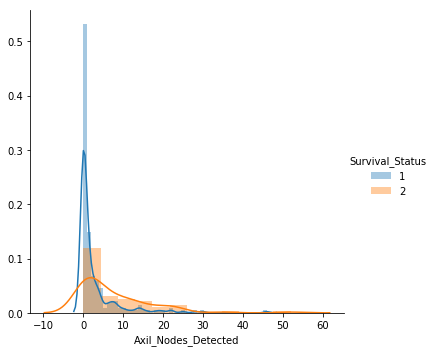

In [14]:
f = sns.FacetGrid(data = df, hue = 'Survival_Status', size = 5)
f.map(sns.distplot, 'Axil_Nodes_Detected')
f.add_legend()

# Observation:

1) Less overlap when compared to Age and Operation_Year

2) Patients with less number of axil nodes have survived cancer for more than 5 years after operation.

3) We can use 'Axil_Nodes_Detected' data to analyse.

# PDF: Probability Density Function and CDF: Cummulative Density Function.

We can use Axil_Nodes_Detected data to analyse Survival_Status

pdf
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]

bins
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


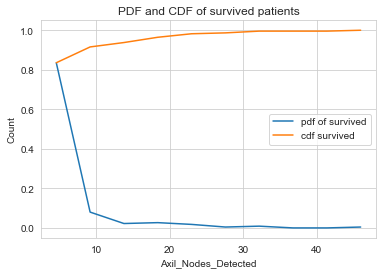

In [15]:
sns.set_style('whitegrid')

counts, bins = np.histogram(df[df['Survival_Status']==1]['Axil_Nodes_Detected'], bins = 10, density = True)

pdf = counts/sum(counts)
print('pdf')
print(pdf)
print()
print('bins')
print(bins)

cdf = np.cumsum(pdf)

plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)

plt.title('PDF and CDF of survived patients')
plt.xlabel('Axil_Nodes_Detected')
plt.ylabel('Count')
plt.legend(['pdf of survived', 'cdf survived'])

# Observation:

From the CDF, 90% patients who survived cancer after operation have 10 axil nodes

pdf
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]

bins
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


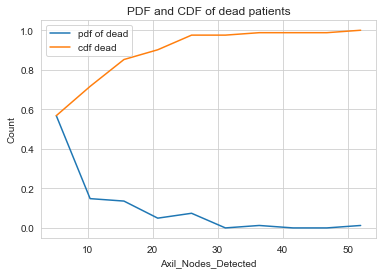

In [16]:
sns.set_style('whitegrid')

counts, bins = np.histogram(df[df['Survival_Status']==2]['Axil_Nodes_Detected'], bins = 10, density = True)

pdf = counts/sum(counts)
print('pdf')
print(pdf)
print()
print('bins')
print(bins)

cdf = np.cumsum(pdf)

plt.plot(bins[1:], pdf)
plt.plot(bins[1:], cdf)

plt.title('PDF and CDF of dead patients')
plt.xlabel('Axil_Nodes_Detected')
plt.ylabel('Count')
plt.legend(['pdf of dead', 'cdf dead'])

# Observation:

From the CDF, 70% patients who died cancer after operation have more than 10 axil nodes

# Mean, Median, Standard Deviation

In [17]:
print('****** Mean of Axil_Nodes_Detected for survived and dead patients ******', '\n')
print('Survived patients')
print(df[df['Survival_Status']== 1]['Axil_Nodes_Detected'].mean(), '\n')
print('Dead patients')
print(df[df['Survival_Status']== 2]['Axil_Nodes_Detected'].mean(), '\n')

print('****** Median of Axil_Nodes_Detected for survived and dead patients ******', '\n')
print('Survived patients')
print(df[df['Survival_Status']== 1]['Axil_Nodes_Detected'].median(), '\n')
print('Dead patients')
print(df[df['Survival_Status']== 2]['Axil_Nodes_Detected'].median(), '\n')

print('****** Standard deviation of Axil_Nodes_Detected for survived and dead patients ******', '\n')
print('Survived patients')
print(df[df['Survival_Status']== 1]['Axil_Nodes_Detected'].std(), '\n')
print('Dead patients')
print(df[df['Survival_Status']== 2]['Axil_Nodes_Detected'].std(), '\n')

****** Mean of Axil_Nodes_Detected for survived and dead patients ****** 

Survived patients
2.7911111111111113 

Dead patients
7.45679012345679 

****** Median of Axil_Nodes_Detected for survived and dead patients ****** 

Survived patients
0.0 

Dead patients
4.0 

****** Standard deviation of Axil_Nodes_Detected for survived and dead patients ****** 

Survived patients
5.870318127719734 

Dead patients
9.185653736555784 



# Percentile of Axil_Nodes_Detected

In [18]:
print('****** Percentiles of Axil_Nodes_Detected for survived and dead patients ******', '\n')

print('Survived patients', '\n')
print('10th percentile is' + ' '+ str(np.percentile(df[df['Survival_Status']==1]['Axil_Nodes_Detected'], 10)))
print('60th percentile is' + ' '+ str(np.percentile(df[df['Survival_Status']==1]['Axil_Nodes_Detected'], 60)))
print('90th percentile is' + ' '+ str(np.percentile(df[df['Survival_Status']==1]['Axil_Nodes_Detected'], 90)))
print('99th percentile is' + ' '+ str(np.percentile(df[df['Survival_Status']==1]['Axil_Nodes_Detected'], 99)))

print()
print('Dead patients', '\n')
print('10th percentile is' + ' '+ str(np.percentile(df[df['Survival_Status']==2]['Axil_Nodes_Detected'], 10)))
print('60th percentile is' + ' '+ str(np.percentile(df[df['Survival_Status']==2]['Axil_Nodes_Detected'], 60)))
print('90th percentile is' + ' '+ str(np.percentile(df[df['Survival_Status']==2]['Axil_Nodes_Detected'], 90)))
print('99th percentile is' + ' '+ str(np.percentile(df[df['Survival_Status']==2]['Axil_Nodes_Detected'], 99)))

****** Percentiles of Axil_Nodes_Detected for survived and dead patients ****** 

Survived patients 

10th percentile is 0.0
60th percentile is 1.0
90th percentile is 8.0
99th percentile is 27.279999999999973

Dead patients 

10th percentile is 0.0
60th percentile is 6.0
90th percentile is 20.0
99th percentile is 38.40000000000005


# Quantile of Axil_Nodes_Detected

In [19]:
print('****** Quantiles of Axil_Nodes_Detected ******', '\n')

print('Survived patients')
print(np.percentile(df[df['Survival_Status']==1]['Axil_Nodes_Detected'], np.arange(0,100,25)))

print()
print('Dead patients')
print(np.percentile(df[df['Survival_Status']==2]['Axil_Nodes_Detected'], np.arange(0,100,25)))

****** Quantiles of Axil_Nodes_Detected ****** 

Survived patients
[0. 0. 0. 3.]

Dead patients
[ 0.  1.  4. 11.]


# Median Absolute Deviation of Axil_Nodes_Detected.

In [20]:
from statsmodels import robust

print('****** Median Absolute Deviation of Axil_Nodes_Detected for survived and dead patients ******', '\n')

print('Survived patients')
print('MAD:' + ' ' + str(robust.mad(df[df['Survival_Status']==1]['Axil_Nodes_Detected'])))

print()
print('Dead patients')
print('MAD:' + ' ' + str(robust.mad(df[df['Survival_Status']==2]['Axil_Nodes_Detected'])))

****** Median Absolute Deviation of Axil_Nodes_Detected for survived and dead patients ****** 

Survived patients
MAD: 0.0

Dead patients
MAD: 5.930408874022408


# Box plot to get percentiles graphically.

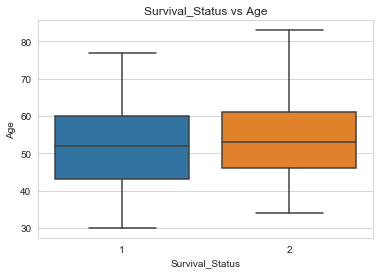

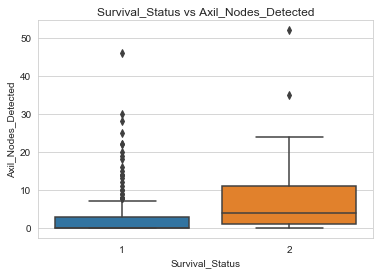

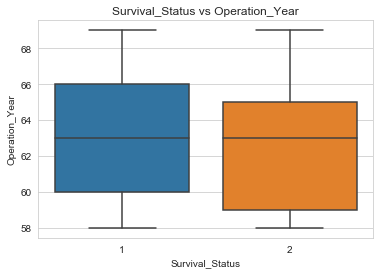

In [21]:
sns.boxplot(x = 'Survival_Status', y = 'Age', data = df)
plt.title('Survival_Status vs Age')
plt.show()

sns.boxplot(x = 'Survival_Status', y = 'Axil_Nodes_Detected', data = df)
plt.title('Survival_Status vs Axil_Nodes_Detected')
plt.show()

sns.boxplot(x = 'Survival_Status', y = 'Operation_Year', data = df)
plt.title('Survival_Status vs Operation_Year')
plt.show()

# Violin plot to get percentiles graphically.

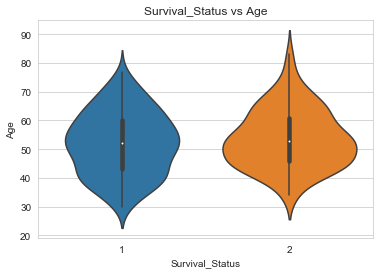

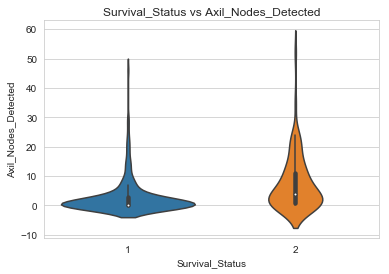

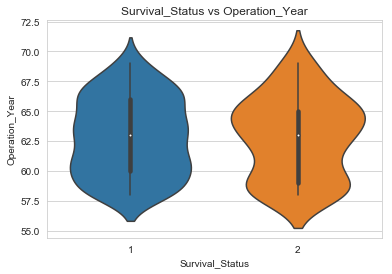

In [22]:
sns.violinplot(x = 'Survival_Status', y = 'Age', data = df)
plt.title('Survival_Status vs Age')
plt.show()

sns.violinplot(x = 'Survival_Status', y = 'Axil_Nodes_Detected', data = df)
plt.title('Survival_Status vs Axil_Nodes_Detected')
plt.show()

plt.title('Survival_Status vs Operation_Year')
sns.violinplot(x = 'Survival_Status', y = 'Operation_Year', data = df)
plt.show()

# Bivariate analysis

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


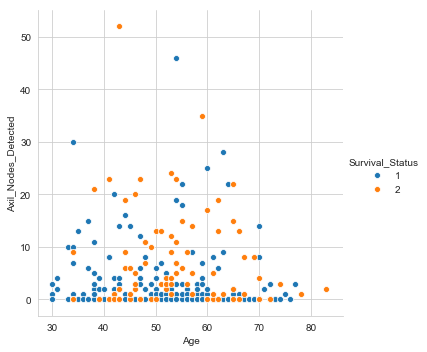

In [23]:
f = sns.FacetGrid(data = df, hue = 'Survival_Status', size = 5)
f.map(sns.scatterplot, 'Age','Axil_Nodes_Detected')
f.add_legend()

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


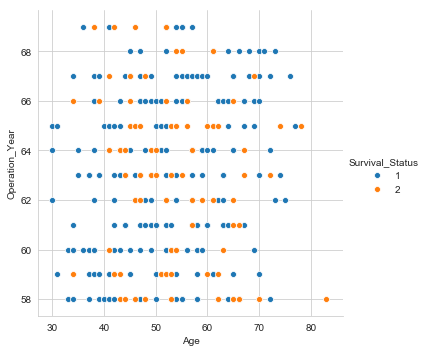

In [24]:
f = sns.FacetGrid(data = df, hue = 'Survival_Status', size = 5)
f.map(sns.scatterplot, 'Age','Operation_Year')
f.add_legend()

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


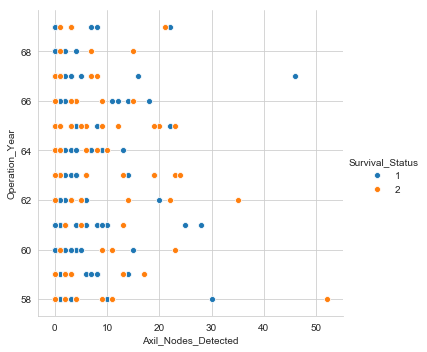

In [25]:
f = sns.FacetGrid(data = df, hue = 'Survival_Status', size = 5)
f.map(sns.scatterplot, 'Axil_Nodes_Detected','Operation_Year')
f.add_legend()

# Observation:

Since all scatter plots are overlapping, they shouldn't be considered to analyse.

# Pair plot

c:\users\brothers\appdata\local\programs\python\python36\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


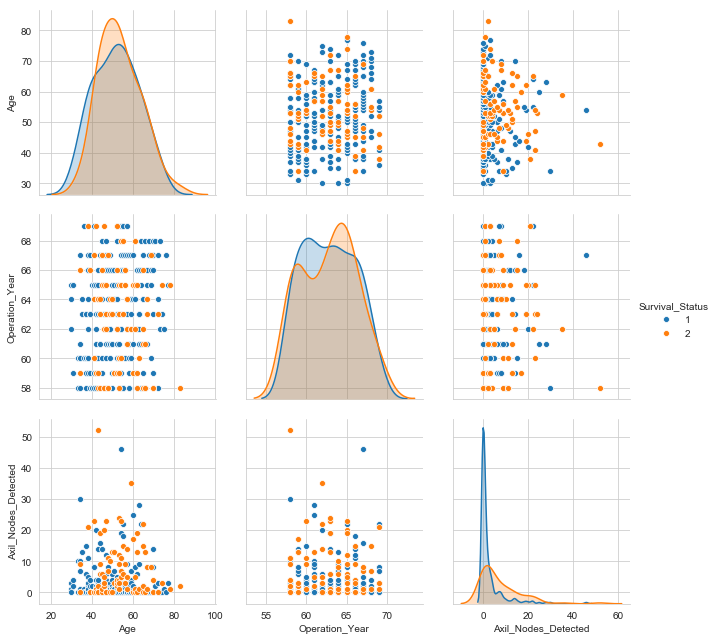

In [26]:
sns.pairplot(data = df, hue = 'Survival_Status', vars = ['Age', 'Operation_Year', 'Axil_Nodes_Detected'], size=3)

# Observation:
    
As we see, only Axil_Nodes_Detected is better when compared to Age and Operation_Year.

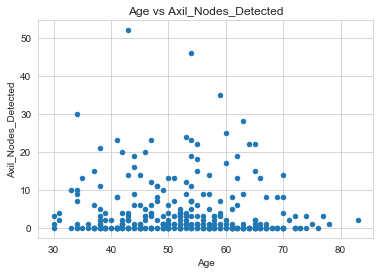

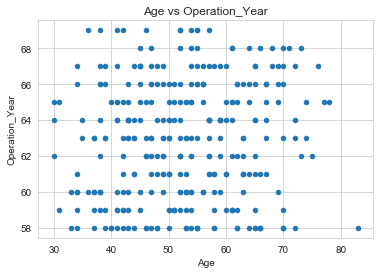

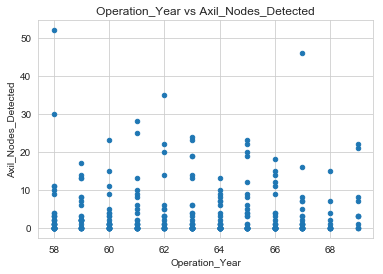

In [27]:
df.plot(kind='scatter', x='Age', y='Axil_Nodes_Detected')
plt.title('Age vs Axil_Nodes_Detected')
plt.show()

df.plot(kind='scatter', x='Age', y='Operation_Year')
plt.title('Age vs Operation_Year')
plt.show()

df.plot(kind='scatter', x='Operation_Year', y='Axil_Nodes_Detected')
plt.title('Operation_Year vs Axil_Nodes_Detected')
plt.show()

# Multivariate analysis

Contour plot

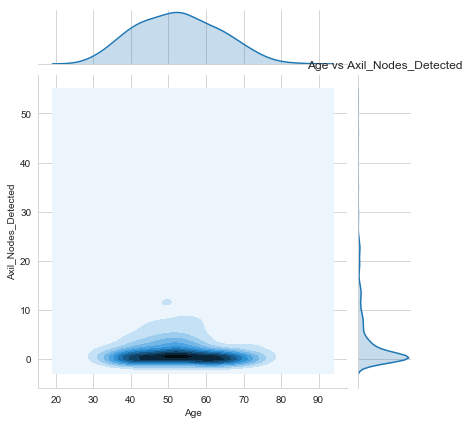

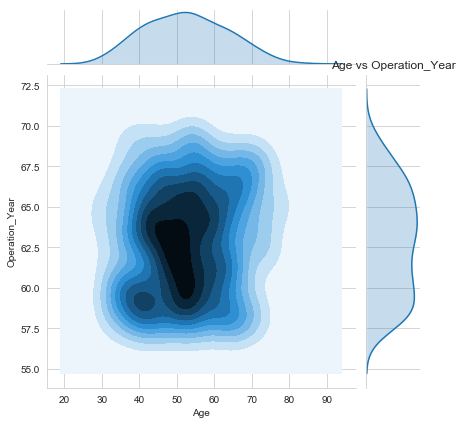

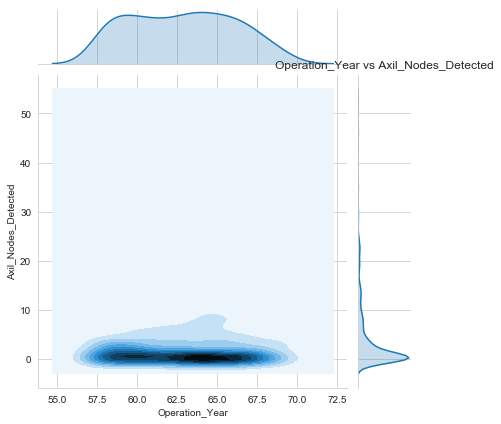

In [28]:
sns.jointplot(data = df, x='Age', y='Axil_Nodes_Detected', kind='kde')
plt.title('Age vs Axil_Nodes_Detected')
plt.show()

sns.jointplot(data = df, x='Age', y='Operation_Year', kind='kde')
plt.title('Age vs Operation_Year')
plt.show()

sns.jointplot(data = df, x='Operation_Year', y='Axil_Nodes_Detected', kind='kde')
plt.title('Operation_Year vs Axil_Nodes_Detected')
plt.show()

# Statistical analysation of survived and died patients.

In [29]:
# Status of died patients within 5 years of operation

df[df['Survival_Status']==1].describe()

,Age,Operation_Year,Axil_Nodes_Detected,Survival_Status
count,225.000000,225.000000,225.000000,225.0
mean,52.017778,62.862222,2.791111,1.0
std,11.012154,3.222915,5.870318,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [30]:
# Status of died patients within 5 years of operation

df[df['Survival_Status']==2].describe()

,Age,Operation_Year,Axil_Nodes_Detected,Survival_Status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


# Conclusion:
    
1) Axil_Nodes_Detected feature is better than Age and Operation_Year feature to analyse survival status of patients.

2) Most patients (90%) with less axil nodes (<10) survived for more than 5 years after operation.

3) Patients having more axil nodes (>10) have more chances of dying within 5 years after operation.